# Basemap 

In the following example we use Pandas to read in a table into a DataFrame and generate a map using the Basemap module.

Tsunami event data downloaded from NOAA/WDS Global Historical Tsunami Database from NGDC
http://www.ngdc.noaa.gov/hazard/tsu_db.shtml

In [45]:
%pylab inline
import pandas as pd 
D=pd.read_table('data/tsrunup.txt',encoding = "ISO-8859-1",parse_dates=[[2,3,4]])


Populating the interactive namespace from numpy and matplotlib


In [23]:
D.keys()

Index(['YEAR_MONTH_DAY', 'I_D', 'TSEVENT_ID', 'HOUR', 'MINUTE', 'SECOND',
       'DOUBTFUL', 'COUNTRY', 'STATE', 'LOCATION_NAME', 'LATITUDE',
       'LONGITUDE', 'REGION_CODE', 'DISTANCE_FROM_SOURCE', 'ARR_DAY',
       'ARR_HOUR', 'ARR_MIN', 'TRAVEL_TIME_HOURS', 'TRAVEL_TIME_MINUTES',
       'WATER_HT', 'HORIZONTAL_INUNDATION', 'TYPE_MEASUREMENT_ID', 'PERIOD',
       'FIRST_MOTION', 'DEATHS', 'DEATHS_DESCRIPTION', 'INJURIES',
       'INJURIES_DESCRIPTION', 'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_DESCRIPTION',
       'HOUSES_DAMAGED', 'HOUSES_DAMAGED_DESCRIPTION', 'HOUSES_DESTROYED',
       'HOUSES_DESTROYED_DESCRIPTION'],
      dtype='object')

## Basemap visualization

/usr/lib/python3/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


Text(0.5,1,'Tsunami events from -2000 to 1900 ')

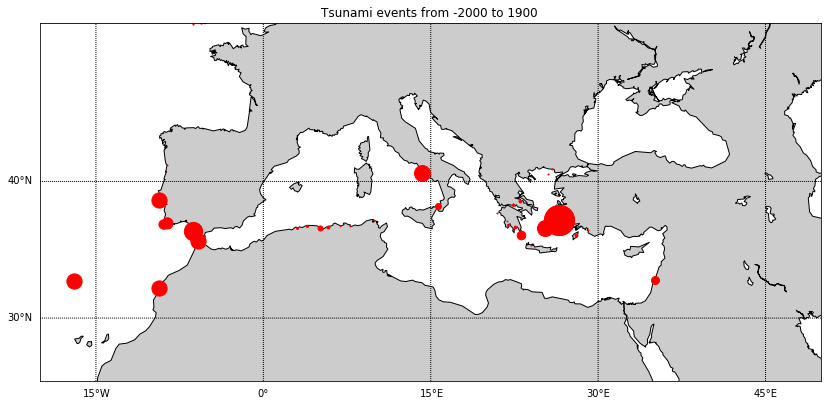

In [44]:
from mpl_toolkits.basemap import Basemap


figure(figsize=(14,10))
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=50,\
            llcrnrlon=-20,urcrnrlon=50,lat_ts=40,resolution='l')
m.drawcoastlines()
m.fillcontinents()
# draw parallels and meridians.
m.drawparallels(arange(-90.,91.,10.),labels=(True,False,False,False))
m.drawmeridians(arange(-180.,181.,15.),labels=(False,False,False,True))
#m.drawmapboundary(fill_color='white')

# Chooe index
start=0
ende=3000

date1=str(D['YEAR_MONTH_DAY'][start])[0:5]
date2=str(D['YEAR_MONTH_DAY'][ende])[0:5]

for i in range(start,ende):
    WH=D['WATER_HT'][i]
    
    x,y=m(D['LONGITUDE'][i],D['LATITUDE'][i])
    #plot([x],[y],'ro')
    if isfinite(WH):
        plot([x],[y],'ro',ms=WH)
    #else:
    #    mag=5.0
    #    plot([x],[y],'yo',ms=mag) # Use yellow if mag not available
        
title("Tsunami events from " +date1+' to '+date2)